In [1]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(reticulate)
  library(GenomicRanges)
  library(tmpRpkg)
  library(ComplexHeatmap)
  #library(magick)
})
# change the size of figures shown in jupyter
options(repr.plot.width=15, repr.plot.height=8)
Sys.setenv("_R_USE_PIPEBIND_" = TRUE)


In [3]:
# * set up ggplot
density.theme <-   theme_bw() +
  theme(axis.text.x=element_text(colour = "black", size = 8),
    axis.text.y=element_text(colour = "black", size = 8),
    axis.title.x=element_text(colour = "black", size = 8),
    axis.title.y=element_text(colour = "black", size = 8))

In [5]:
# * meta
projd <- "/projects/ps-renlab2/szu/projects/amb_pairedtag"
workd <- file.path(projd, "13.cicero")
outd <- file.path(workd, "out")
cor_pdc_fnm <- file.path(outd, "all.H3K27ac.pdc.cor.csv")
cor_shuf_fnm <- file.path(outd, "shuf.H3K27ac.pdc.cor.csv")
density_fignm <- file.path(outd, "all.H3K27ac.pdc.cor.pdf")

In [7]:
cor_pdc <- data.table::fread(file = cor_pdc_fnm, header = F, sep = ",", data.table = F) |>
 setNames(object = _,nm = c("CRE", "gene", "cor"))
cor_shuf <- data.table::fread(file = cor_shuf_fnm, header = F, sep = ",", data.table = F) |>
 setNames(object = _,nm = c("CRE", "gene", "cor"))

In [13]:
withr::with_pdf(new = density_fignm,
  code =  {
    data.pear <- rbind(cor_pdc, cor_shuf)
    data.pear$class <- c(rep("Real.Pearson", nrow(cor_pdc)),
      rep("RdmShuf.Pearson", nrow(cor_shuf)))
    p.pear <- ggplot(data.pear, aes(x = cor, colour = class)) +
      geom_density() +
      ggtitle("Pearson correlation") +
      density.theme
    print(p.pear)
  }
)

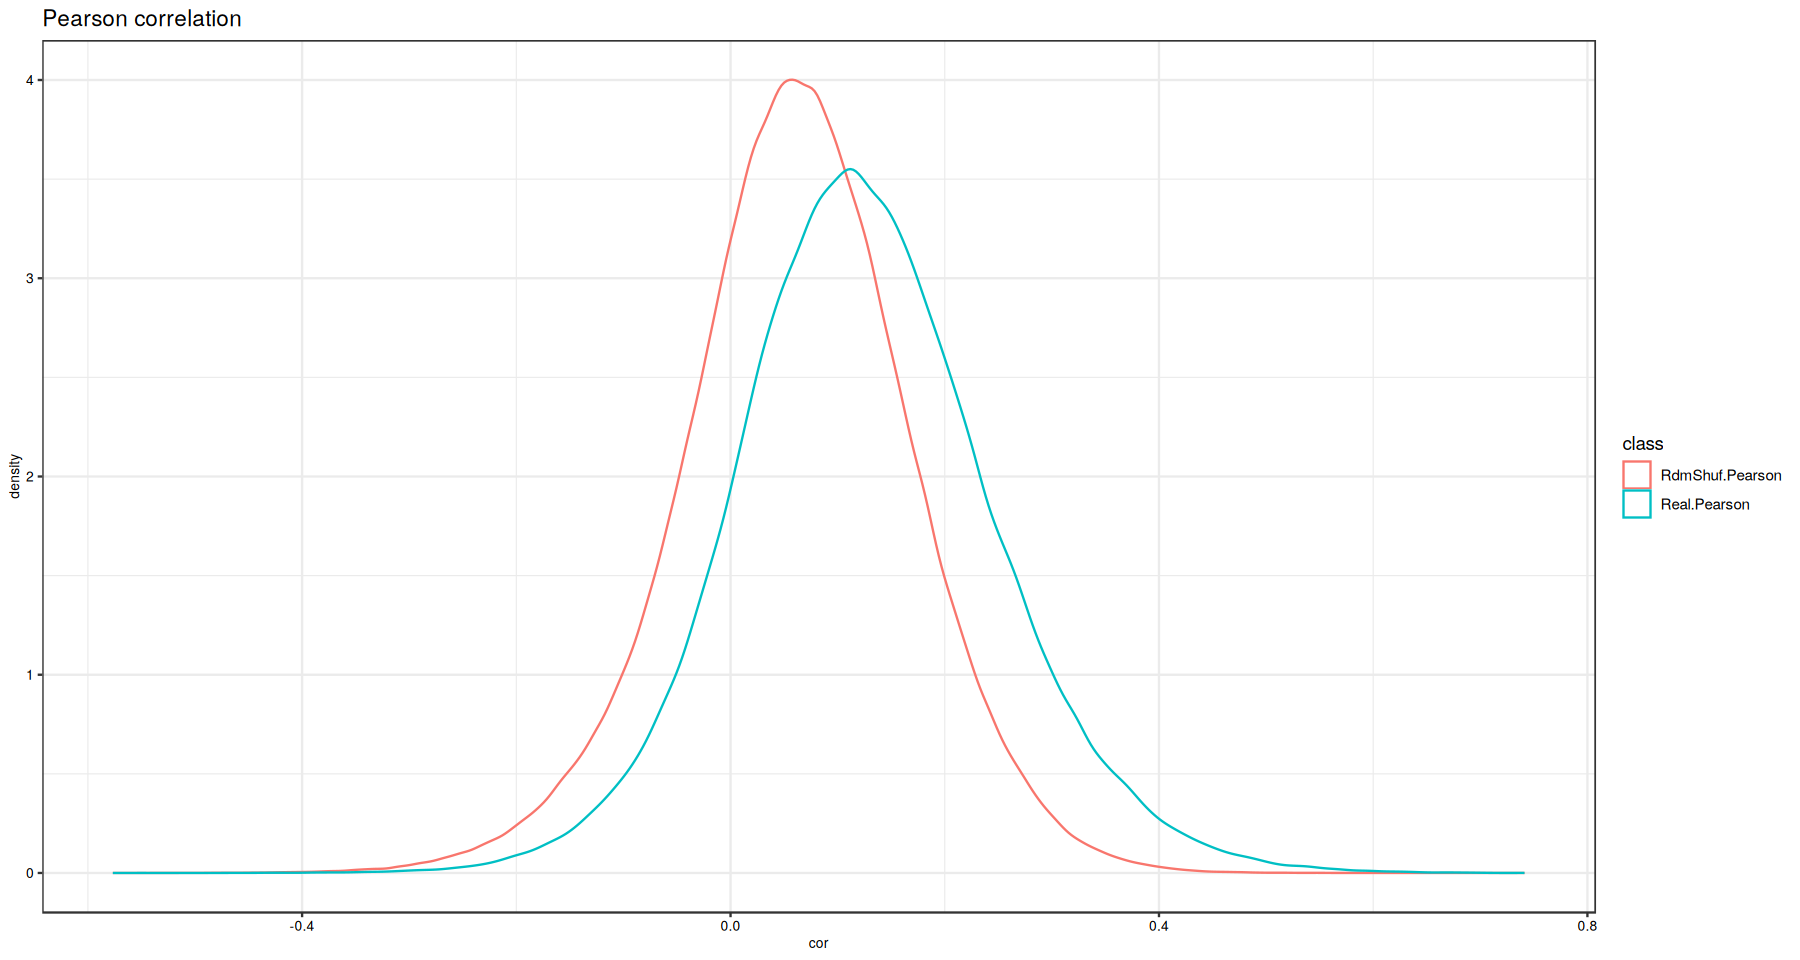

In [14]:
   data.pear <- rbind(cor_pdc, cor_shuf)
    data.pear$class <- c(rep("Real.Pearson", nrow(cor_pdc)),
      rep("RdmShuf.Pearson", nrow(cor_shuf)))
    p.pear <- ggplot(data.pear, aes(x = cor, colour = class)) +
      geom_density() +
      ggtitle("Pearson correlation") +
      density.theme
    print(p.pear)


In [12]:
mean_bg <- mean(cor_shuf$cor)
sd_bg <- sd(cor_shuf$cor)
mean_bg + 2 * sd_bg
sum(cor_pdc$cor > mean_bg + 2 * sd_bg)
length(unique(cor_pdc$CRE[cor_pdc$cor > mean_bg + 2 * sd_bg]))
length(unique(cor_pdc$gene[cor_pdc$cor > mean_bg + 2 * sd_bg]))


[1] 0.2755076

[1] 29836

[1] 21273

[1] 3472